*To be used for training Model*


In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# This is used to display the plots in the notebook
%matplotlib inline 


In [ ]:
import kaggle
import pandas as pd

# Download the dataset
kaggle.api.dataset_download_files('asinow/car-price-dataset', path='./', unzip=True)
# adjust filename if different

In [10]:
df = pd.read_csv('car_price_dataset.csv')

df.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [ ]:
df.describe().round(2)

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2011.54,3.00,149239.11,3.50,2.99,8852.96
std,6.90,1.15,86322.35,1.11,1.42,3112.60
min,2000.00,1.00,25.00,2.00,1.00,2000.00
25%,2006.00,2.00,74649.25,3.00,2.00,6646.00
50%,2012.00,3.00,149587.00,3.00,3.00,8858.50
75%,2017.00,4.00,223577.50,4.00,4.00,11086.50
max,2023.00,5.00,299947.00,5.00,5.00,18301.00


In [15]:
df.isnull().sum()


Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [17]:
#change all the column names to lowercase
df.columns = df.columns.str.lower()

df.head()


,brand,model,year,engine_size,fuel_type,transmission,mileage,doors,owner_count,price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [18]:
#check for columns with string data type
df.select_dtypes(include=['object']).columns





Index(['brand', 'model', 'fuel_type', 'transmission'], dtype='object')

In [19]:
# change the string variables to lowercase

#use a for loop to change the string variables to lowercase
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

df.head()




,brand,model,year,engine_size,fuel_type,transmission,mileage,doors,owner_count,price
0,kia,rio,2020,4.2,diesel,manual,289944,3,5,8501
1,chevrolet,malibu,2012,2.0,hybrid,automatic,5356,2,3,12092
2,mercedes,gla,2020,4.2,diesel,automatic,231440,4,2,11171
3,audi,q5,2023,2.0,electric,manual,160971,2,1,11780
4,volkswagen,golf,2003,2.6,hybrid,semi-automatic,286618,3,3,2867


In [20]:
#check for duplicate rows
df.duplicated().sum()


0

In [21]:
#check for duplicate rows
df.duplicated().sum()

0

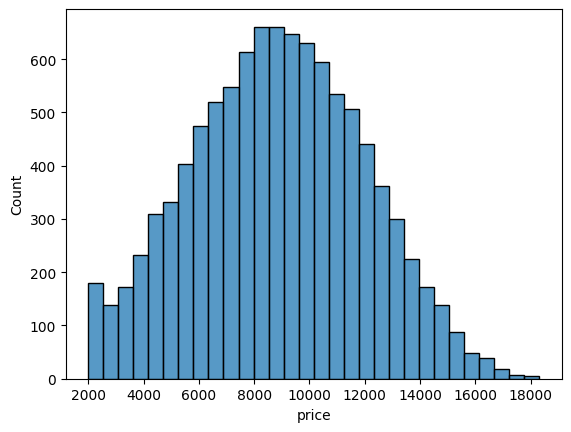

In [23]:
#plot the distribution of the price
sns.histplot(df['price'], bins=30)
plt.show()






In [24]:
#unique values in the dataset
df.nunique()







brand             10
model             30
year              24
engine_size       41
fuel_type          4
transmission       3
mileage         9854
doors              4
owner_count        5
price           6661
dtype: int64

In [25]:
#unique value in model column
df['model'].unique()


array(['rio', 'malibu', 'gla', 'q5', 'golf', 'camry', 'civic', 'sportage',
       'rav4', '5 series', 'cr-v', 'elantra', 'tiguan', 'equinox',
       'explorer', 'a3', '3 series', 'tucson', 'passat', 'impala',
       'corolla', 'optima', 'fiesta', 'a4', 'focus', 'e-class', 'sonata',
       'c-class', 'x5', 'accord'], dtype=object)

In [26]:
#in all the columns with string data type, replace the ' ' with '_', and '-' with '_'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace(' ', '_')
    df[col] = df[col].str.replace('-', '_')

df.head()



,brand,model,year,engine_size,fuel_type,transmission,mileage,doors,owner_count,price
0,kia,rio,2020,4.2,diesel,manual,289944,3,5,8501
1,chevrolet,malibu,2012,2.0,hybrid,automatic,5356,2,3,12092
2,mercedes,gla,2020,4.2,diesel,automatic,231440,4,2,11171
3,audi,q5,2023,2.0,electric,manual,160971,2,1,11780
4,volkswagen,golf,2003,2.6,hybrid,semi_automatic,286618,3,3,2867


In [27]:
df['model'].unique()

array(['rio', 'malibu', 'gla', 'q5', 'golf', 'camry', 'civic', 'sportage',
       'rav4', '5_series', 'cr_v', 'elantra', 'tiguan', 'equinox',
       'explorer', 'a3', '3_series', 'tucson', 'passat', 'impala',
       'corolla', 'optima', 'fiesta', 'a4', 'focus', 'e_class', 'sonata',
       'c_class', 'x5', 'accord'], dtype=object)

In [28]:
df.isnull().sum()


brand           0
model           0
year            0
engine_size     0
fuel_type       0
transmission    0
mileage         0
doors           0
owner_count     0
price           0
dtype: int64

In [29]:
len(df)

10000

In [33]:
#we need to split the data into 60% training 20% validation and 20% test

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_test , n_train , n_val



(2000, 6000, 2000)

In [35]:
#we need a variable to shuffle the data
df_shuffled = df.sample(n, random_state=42)
df_shuffled


,brand,model,year,engine_size,fuel_type,transmission,mileage,doors,owner_count,price
6252,bmw,3_series,2005,1.2,diesel,manual,257760,5,5,2000
4684,volkswagen,golf,2013,2.9,hybrid,automatic,111790,5,3,11164
1731,toyota,rav4,2011,5.0,hybrid,automatic,13473,5,4,14630
4742,mercedes,e_class,2007,3.8,diesel,manual,133298,4,5,7334
4521,honda,civic,2012,1.3,petrol,automatic,18611,3,5,10127
...,...,...,...,...,...,...,...,...,...,...
5734,bmw,x5,2009,1.8,petrol,semi_automatic,281531,4,1,2969
5191,honda,cr_v,2015,4.5,electric,semi_automatic,223211,3,5,10635
5390,bmw,x5,2006,4.5,petrol,semi_automatic,54111,5,5,9317
860,toyota,rav4,2016,4.4,diesel,semi_automatic,265121,3,4,7997


In [37]:
#split the data into training, validation and test
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]


In [39]:
#check the shape of the data
df_train.shape, df_val.shape, df_test.shape



((6000, 10), (2000, 10), (2000, 10))

In [40]:
df_train.head()

,brand,model,year,engine_size,fuel_type,transmission,mileage,doors,owner_count,price
399,hyundai,sonata,2009,4.4,hybrid,semi_automatic,282931,5,3,6541
7247,hyundai,tucson,2005,4.7,hybrid,manual,43765,5,1,10424
6406,honda,civic,2003,4.2,petrol,semi_automatic,287097,3,4,3458
882,toyota,corolla,2019,2.7,diesel,automatic,259113,4,5,8817
3565,volkswagen,passat,2002,4.3,petrol,semi_automatic,160517,4,4,5789


In [41]:
#reset the index of the data
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [43]:
#apply the logip function to the price column nd get the values
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

print(y_train)


[7.60140233 9.32053916 9.59089784 ... 8.52337405 8.80041533 8.96213539]


In [44]:
#drop the price column  to prevent the target variable from being used as a feature
del df_train['price']
del df_val['price']
del df_test['price']


`Linear Regression`     

In [46]:
# simple linear regression
w0 = 7.17
w = [0.2 , 0.3 , 0.4]

w_new = [w0] + w

w_new








[7.17, 0.2, 0.3, 0.4]